## Assignment 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Part1 recall and precision

In [2]:
def getRecallAndPrecision(relatedDocuments,answerSet):
    recall_list = []
    precision_list = []
    common_documents = []
    count = 1
    for i in range(len(answerSet)):
        if answer_set[i] in relatedDocuments:
            recall = (count/len(relatedDocuments))
            precision = (count/(i+1))
            precision_list.append(precision)
            recall_list.append(recall)
            common_documents.append(answer_set[i])
            count = count+1
    return recall_list,precision_list,common_documents

def getDataFrame(recall_list,precision_list,common_documents):
    df = pd.DataFrame(list(zip(recall_list, precision_list)), index = common_documents, columns =["Recall","Precision"])
    return df

def getR_precision(relatedDocument,answerSet):
    r_precision = 0
    common = []
    for i in range(len(relatedDocument)):
        if answerSet[i] in relatedDocument:
            common.append(answerSet[i])
    r_precision = (len(common))/(len(relatedDocument))
    return r_precision

def standard11Recall(data):
    recall = [0]
    precision = [data["precision"][0]]
    for i in np.arange(0.1,1.1,0.1):
        i = round(i,1)
        recall.append(i)
        if len(data["recall"])==0:
            precision.append(0)
        else:
            if data["recall"][0]>i:
                precision.append(data["precision"][0])
                
            elif data["recall"][0]==i:
                precision.append(data["precision"][0])
                data["recall"].pop(0)
                data["precision"].pop(0)
                
            else:
                data["recall"].pop(0)
                data["precision"].pop(0)
                precision.append(data["precision"][0])
           
    return recall,precision



In [3]:
related_documents = ["d3","d5","d9","d25","d39","d44","d56","d71","d89","d123"]
answer_set = ["d123","d84","d56","d6","d8","d9","d511","d129","d187","d25","d38","d48","d250","d113","d3"]

In [4]:
related_documents_2 = ["d3","d56","d129"]
answer_set_2 = ["d123","d84","d56","d6","d8","d9","d511","d129","d187","d25","d38","d48","d250","d113","d3"]

In [5]:
recallList,precisionList,commonDocuments=getRecallAndPrecision(related_documents,answer_set)
df = getDataFrame(recallList,precisionList,commonDocuments)
df

,Recall,Precision
d123,0.1,1.000000
d56,0.2,0.666667
d9,0.3,0.500000
d25,0.4,0.400000
d3,0.5,0.333333


In [6]:
recallList2,precisionList2,commonDocuments2 = getRecallAndPrecision(related_documents_2,answer_set_2)
df2 = getDataFrame(recallList2,precisionList2,commonDocuments2)
df2

,Recall,Precision
d56,0.333333,0.333333
d129,0.666667,0.250000
d3,1.000000,0.200000


In [7]:
print("R-Precision for first set : ",getR_precision(related_documents,answer_set))

R-Precision for first set :  0.4


In [8]:
print("R-Precision for second set : ",getR_precision(related_documents_2,answer_set_2))

R-Precision for second set :  0.3333333333333333


In [9]:
rp_dict_1 = {"doc":commonDocuments,"recall":recallList,"precision":precisionList}
recall_1,precision_1 = standard11Recall(rp_dict_1) 
print(recall_1)
print(" ")
print(precision_1)

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
 
[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.3333333333333333, 0, 0, 0, 0, 0]


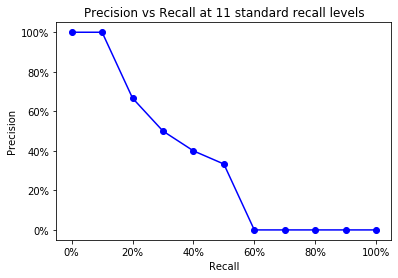

In [10]:
plt.plot(recall_1,precision_1,"bo-")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Precision vs Recall at 11 standard recall levels")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Part 2

In [12]:
rd1 = ['d15', 'd6', 'd7', 'd3', 'd18', 'd17', 'd10', 'd5', 'd11']
rd2 = ['d13', 'd18', 'd17', 'd5', 'd1', 'd12', 'd2', 'd15']
rd3 = ['d5', 'd7', 'd6', 'd8', 'd9', 'd3', 'd4']
rd4 = ['d1', 'd15', 'd7', 'd3', 'd16', 'd8', 'd17', 'd19', 'd5']
rd5 = ['d19', 'd17', 'd14', 'd18', 'd1', 'd5', 'd16', 'd20', 'd11']

algo_A_answer_set_1 = ['d7', 'd12', 'd10', 'd1', 'd2', 'd18', 'd19', 'd5', 'd8', 'd6', 'd11', 'd9', 'd3', 'd15', 'd14', 'd16']
algo_A_answer_set_2 = ['d3', 'd2', 'd18', 'd15', 'd16', 'd1', 'd19', 'd13', 'd20', 'd7', 'd4', 'd6', 'd5', 'd17']
algo_A_answer_set_3 = ['d14', 'd19', 'd9', 'd12', 'd5', 'd6', 'd16', 'd15', 'd2', 'd3', 'd17', 'd1', 'd13']
algo_A_answer_set_4 = ['d13', 'd15', 'd6', 'd9', 'd4', 'd18', 'd7', 'd3', 'd11', 'd16', 'd14', 'd5', 'd8', 'd20', 'd10', 'd2']
algo_A_answer_set_5 = ['d1', 'd18', 'd6', 'd3', 'd5', 'd9', 'd11', 'd2', 'd17', 'd10', 'd15', 'd13', 'd4']

algo_B_answer_set_1 = ['d20', 'd2', 'd9', 'd3', 'd14', 'd12', 'd18', 'd4', 'd10', 'd6', 'd11', 'd17', 'd1', 'd16', 'd8']
algo_B_answer_set_2 = ['d11', 'd19', 'd4', 'd5', 'd1', 'd20', 'd18', 'd14', 'd3', 'd9', 'd16', 'd15', 'd17']
algo_B_answer_set_3 = ['d2', 'd8', 'd3', 'd10', 'd18', 'd1', 'd12', 'd15', 'd20', 'd17', 'd6', 'd5', 'd19', 'd4', 'd11']
algo_B_answer_set_4 = ['d20', 'd7', 'd16', 'd13', 'd5', 'd9', 'd19', 'd18', 'd12', 'd1', 'd17', 'd8', 'd15', 'd14']
algo_B_answer_set_5 = ['d6', 'd8', 'd3', 'd12', 'd4', 'd18', 'd1', 'd15', 'd20', 'd11', 'd7', 'd17', 'd14']


In [13]:
revelent_docs_combined = [rd1,rd2,rd3,rd4,rd5]
algo_A_combined = [algo_A_answer_set_1,algo_A_answer_set_2,algo_A_answer_set_3,algo_A_answer_set_4,algo_A_answer_set_5]
algo_b_combined = [algo_B_answer_set_1,algo_B_answer_set_2,algo_B_answer_set_3,algo_B_answer_set_4,algo_B_answer_set_5]

In [14]:
r_precision_list_A=[]
for releventDocs,answerSetAlgoA in zip(revelent_docs_combined,algo_A_combined):
    p = getR_precision(releventDocs,answerSetAlgoA)
    r_precision_list_A.append(p)
print(r_precision_list_A)   

[0.4444444444444444, 0.625, 0.42857142857142855, 0.3333333333333333, 0.5555555555555556]


In [15]:
r_precision_list_B=[]
for releventDocs,answerSetAlgoB in zip(revelent_docs_combined,algo_b_combined):
    p = getR_precision(releventDocs,answerSetAlgoB)
    r_precision_list_B.append(p)
print(r_precision_list_B)  

[0.3333333333333333, 0.375, 0.2857142857142857, 0.4444444444444444, 0.3333333333333333]


In [16]:
algo_AB_r_precision = [A-B for A,B in zip(r_precision_list_A,r_precision_list_B)]
print(algo_AB_r_precision)

[0.1111111111111111, 0.25, 0.14285714285714285, -0.1111111111111111, 0.22222222222222227]


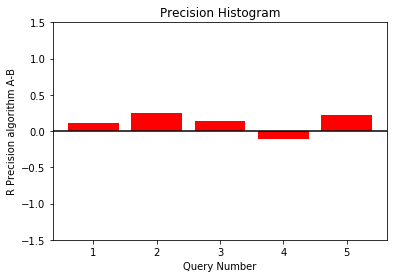

In [17]:
plt.bar(list(range(1,6)),algo_AB_r_precision,color="red",width=0.8)
plt.xticks(list(range(1,6)))
plt.ylim(-1.5,1.5)
plt.axhline(y = 0, color="black",linestyle = '-')
plt.xlabel("Query Number")
plt.ylabel("R Precision algorithm A-B")
plt.title("Precision Histogram")
plt.show()

## Part 3

In [9]:
def harminicMean(h_recall_list,h_precision_list):
    mean_list = []
    for recall,precision in zip(h_recall_list,h_precision_list):
        m = (2)/((1/recall)+(1/precision))
        mean_list.append(m)
    return mean_list

def eMeans(e_recall_list,e_precision_list,b):
    e_list = []
    for recall,precision in zip(e_recall_list,e_precision_list):
        m = 1-((1+(b**2))/(((b**2)/recall)+(1/precision)))
        e_list.append(m)
    return e_list
    

In [10]:
harmonic_mean = harminicMean(recallList,precisionList)
print("Recall for first set : ",recallList)
print("")
print("Precision for first list : ",precisionList)
print("")
print("Harmonic Mean for first set :",harmonic_mean)

Recall for first set :  [0.1, 0.2, 0.3, 0.4, 0.5]

Precision for first list :  [1.0, 0.6666666666666666, 0.5, 0.4, 0.3333333333333333]

Harmonic Mean for first set : [0.18181818181818182, 0.3076923076923077, 0.37499999999999994, 0.4, 0.4]


In [11]:
print("E-means for first set when b = 1 : ",eMeans(recallList,precisionList,1))
print("E-means for first set when b < 1 b=0.2 : ",eMeans(recallList,precisionList,0.2))
print("E-means for first set when b > 1 b=3 : ",eMeans(recallList,precisionList,3))

E-means for first set when b = 1 :  [0.8181818181818181, 0.6923076923076923, 0.625, 0.6, 0.6]
E-means for first set when b < 1 b=0.2 :  [0.25714285714285723, 0.388235294117647, 0.5125, 0.6, 0.6623376623376623]
E-means for first set when b > 1 b=3 :  [0.8901098901098901, 0.7849462365591398, 0.6875, 0.6, 0.5238095238095238]
